In [41]:
#IMPORT THE IPORTANT LIBRARIES
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# LOADING THE DATASET
Netflix_shows_movies = pd.read_csv("C:/brotherman/ASSIGNMENT FOUR/netflix_data.csv")

#TRYING TO VIEW THE FIRST-FIVE OBJECTIVES
Netflix_shows_movies.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,81145628,Movie,Norm of the North: King Sized Adventure,"Richard Finn, Tim Maltby","Alan Marriott, Andrew Toth, Brian Dobson, Cole...","United States, India, South Korea, China","September 9, 2019",2019,TV-PG,90 min,"Children & Family Movies, Comedies",Before planning an awesome wedding for his gra...
1,80117401,Movie,Jandino: Whatever it Takes,NaN,Jandino Asporaat,United Kingdom,"September 9, 2016",2016,TV-MA,94 min,Stand-Up Comedy,Jandino Asporaat riffs on the challenges of ra...
2,70234439,TV Show,Transformers Prime,NaN,"Peter Cullen, Sumalee Montano, Frank Welker, J...",United States,"September 8, 2018",2013,TV-Y7-FV,1 Season,Kids' TV,"With the help of three human allies, the Autob..."
3,80058654,TV Show,Transformers: Robots in Disguise,NaN,"Will Friedle, Darren Criss, Constance Zimmer, ...",United States,"September 8, 2018",2016,TV-Y7,1 Season,Kids' TV,When a prison ship crash unleashes hundreds of...
4,80125979,Movie,#realityhigh,Fernando Lebrija,"Nesta Cooper, Kate Walsh, John Michael Higgins...",United States,"September 8, 2017",2017,TV-14,99 min,Comedies,When nerdy high schooler Dani finally attracts...


In [42]:
#CHECKING FOR MISSING VALUES IN THE DATA
missing_values = Netflix_shows_movies.isnull().sum()
print("Missing values before cleaning:\n", missing_values)

#SOLVING THE PROBLEM OF MISSING DATA BY FILLING IT IN
for column in Netflix_shows_movies.columns:
    if Netflix_shows_movies[column].dtype == 'object':
        Netflix_shows_movies[column].fillna('Unknown', inplace=True)
    else:
        Netflix_shows_movies[column].fillna(Netflix_shows_movies[column].mean(), inplace=True)

Missing values before cleaning:
 show_id            0
type               0
title              0
director        1969
cast             570
country          476
date_added        11
release_year       0
rating            10
duration           0
listed_in          0
description        0
dtype: int64


In [43]:
#DATA DESCRIPTION 
description = Netflix_shows_movies.describe(include='all')
print(description)

             show_id   type        title director     cast        country  \
count   6.234000e+03   6234         6234     6234     6234           6234   
unique           NaN      2         6172     3302     5470            555   
top              NaN  Movie  The Silence  Unknown  Unknown  United States   
freq             NaN   4265            3     1969      570           2032   
mean    7.670368e+07    NaN          NaN      NaN      NaN            NaN   
std     1.094296e+07    NaN          NaN      NaN      NaN            NaN   
min     2.477470e+05    NaN          NaN      NaN      NaN            NaN   
25%     8.003580e+07    NaN          NaN      NaN      NaN            NaN   
50%     8.016337e+07    NaN          NaN      NaN      NaN            NaN   
75%     8.024489e+07    NaN          NaN      NaN      NaN            NaN   
max     8.123573e+07    NaN          NaN      NaN      NaN            NaN   

             date_added  release_year rating  duration      listed_in  \
co

In [44]:
#COUNTING THE NUMBER OF DIRECTORS, THE NUMBER OF COUNTIRES AND THE YEAR OF RELEASE IN THE DATASET
country_counts = Netflix_shows_movies['country'].value_counts()
director_counts = Netflix_shows_movies['director'].value_counts()
number_years = Netflix_shows_movies['release_year'].value_counts()

print("The country count is:\n", country_counts)
print("The directors in the data are:\n", director_counts)
print ("The year of release include:\n", number_years)

The country count is:
 country
United States                                    2032
India                                             777
Unknown                                           476
United Kingdom                                    348
Japan                                             176
                                                 ... 
India, Japan                                        1
Norway, Germany, Sweden                             1
United Kingdom, Canada, France, United States       1
United Arab Emirates, Jordan                        1
Cyprus, Austria, Thailand                           1
Name: count, Length: 555, dtype: int64
The directors in the data are:
 director
Unknown                        1969
Raúl Campos, Jan Suter           18
Marcus Raboy                     14
Jay Karas                        13
Jay Chapman                      12
                               ... 
Ruel S. Bayani                    1
Peter Mortimer, Josh Lowell       1
Greg Co

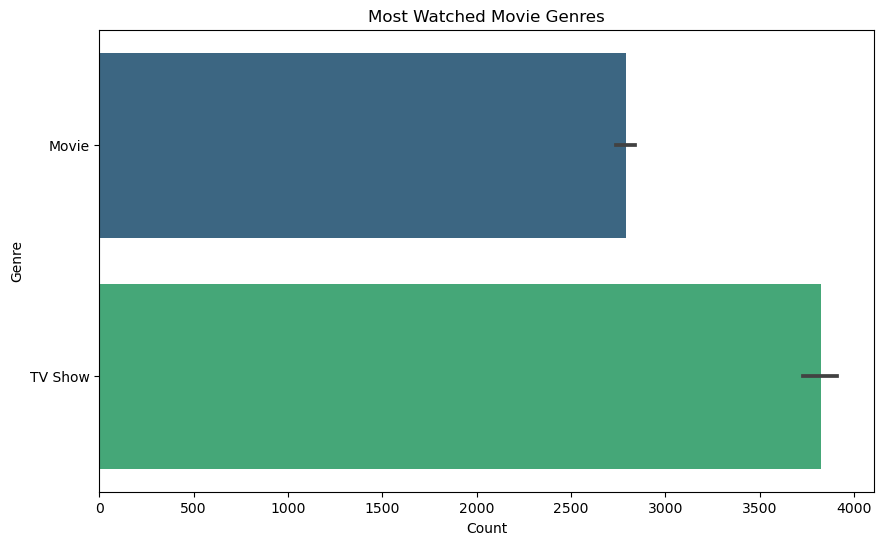

C:\Users\GADGET STORE\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


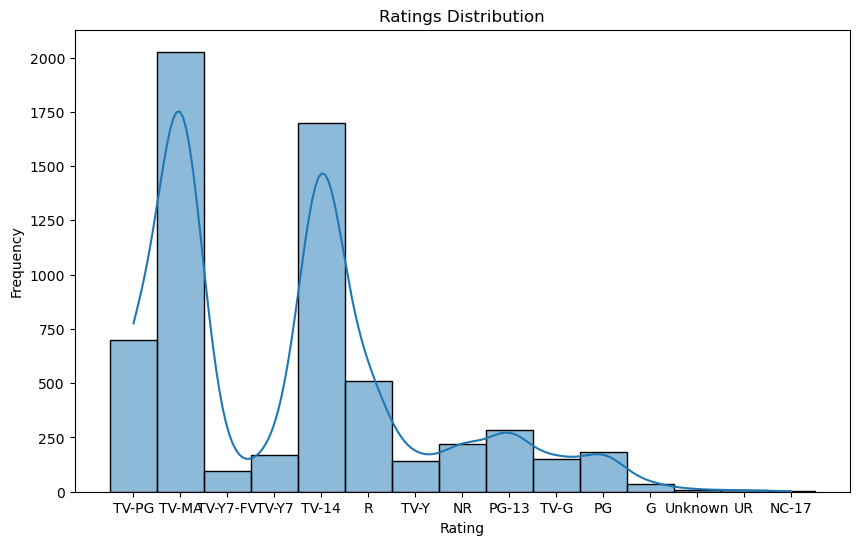

In [45]:
#DATA VISUALIZATION 
genre_counts=Netflix_shows_movies['type']
#Function for plotting the most watched movie
def plot_genres(genre_counts):
    plt.figure(figsize=(10, 6))
    sns.barplot(x=genre_counts.index, y=genre_counts.values, palette='viridis')
    plt.title('Most Watched Movie Genres')
    plt.xlabel('Count')
    plt.ylabel('Genre')
    plt.xticks(rotation=0)
    plt.show()

# Function to plot ratings distribution
def plot_ratings_distribution(df):
    plt.figure(figsize=(10, 6))
    sns.histplot(Netflix_shows_movies['rating'], bins=20, kde=True)
    plt.title('Ratings Distribution')
    plt.xlabel('Rating')
    plt.ylabel('Frequency')
    plt.show()

# Plot visualizations
plot_genres(genre_counts)
plot_ratings_distribution(df)

In [46]:
#SAVING THE CLEANED DATA FOR THE USE IN R
df.to_csv('C:/brotherman/ASSIGNMENT FOUR/Netflix_shows_movies.csv', index=False)